<a href="https://colab.research.google.com/github/Oskarino/Lab3_PTD/blob/main/Lab3_PTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import math
from math import sin, cos, pi, sqrt, log
from scipy.fft import fft
import time

In [2]:
f_s = 8000

phi = pi/120


def table_log(seq):
  return [log(el,10) for el in seq] 


def generate_signal(funkcja, f_s, T):
  return [funkcja(n/f_s) for n in range(int(T*f_s))]


from functools import partial


def widmo_amplitudowe(X):
    return [ sqrt(X[k].real**2 + X[k].imag**2) for k in range(len(X))]

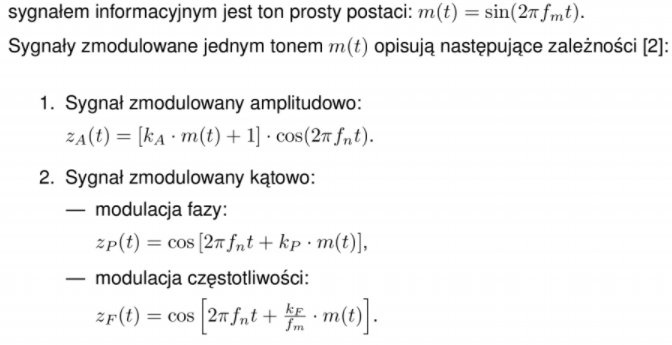

In [3]:
f_m = 200
T = 2
funkcja_m = lambda t: sin(2*pi*f_m*t)
m = generate_signal(funkcja_m, f_m, T)

In [4]:
def modulacja_amplitudowa(funkcja, f_n, K_a):
  return lambda t: (K_a*funkcja(t)+1)*cos(2*pi*f_n*t)

def modulacja_katowa_fazy(funkcja, f_n, K_p):
  return lambda t: cos(2*pi*f_n*t + K_p*funkcja(t))

def modulacja_katowa_czestotliwosci(funkcja, f_n, K_f, f_m):
  return lambda t: cos(2*pi*f_n*t + K_f*funkcja(t)/f_m)

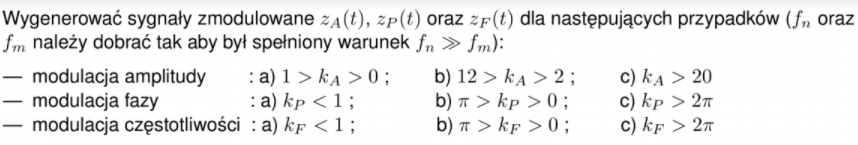

In [5]:
f_n = 1000

#modulacja amplitudy
#a
K_a = 0.4
f_mod_amp_a = modulacja_amplitudowa(funkcja_m, f_n, K_a)
mod_amp_a = generate_signal(f_mod_amp_a, f_m, T)

#b
K_a = 11
f_mod_amp_b = modulacja_amplitudowa(funkcja_m, f_n, K_a)
mod_amp_b = generate_signal(f_mod_amp_b, f_m, T)

#c
K_a = 21
f_mod_amp_c = modulacja_amplitudowa(funkcja_m, f_n, K_a)
mod_amp_c = generate_signal(f_mod_amp_c, f_m, T)


#modulacja fazy
#a
K_p = 0.3
f_mod_kat_a = modulacja_katowa_fazy(funkcja_m, f_n, K_p)
mod_kat_a = generate_signal(f_mod_kat_a, f_m, T)

#b
K_p = 2
f_mod_kat_b = modulacja_katowa_fazy(funkcja_m, f_n, K_p)
mod_kat_b = generate_signal(f_mod_kat_b, f_m, T)


#c
K_p = 8
f_mod_kat_c = modulacja_katowa_fazy(funkcja_m, f_n, K_p)
mod_kat_c = generate_signal(f_mod_kat_c, f_m, T)


#modulacja czestotliwosci
#a
K_f = 0.3
f_mod_czest_a = modulacja_katowa_czestotliwosci(funkcja_m, f_n, K_f, f_m)
mod_czest_a = generate_signal(f_mod_czest_a, f_m, T)

#b
K_f = 2
f_mod_czest_b = modulacja_katowa_czestotliwosci(funkcja_m, f_n, K_f, f_m)
mod_czest_b = generate_signal(f_mod_czest_b, f_m, T)

#c
K_f = 8
f_mod_czest_c = modulacja_katowa_czestotliwosci(funkcja_m, f_n, K_f, f_m)
mod_czest_c = generate_signal(f_mod_czest_c, f_m, T)

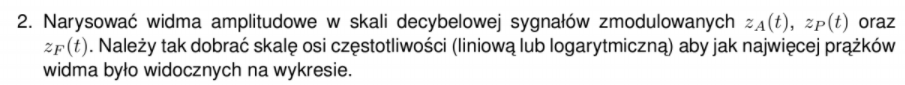

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=0.4 [skala logarytmiczna]')

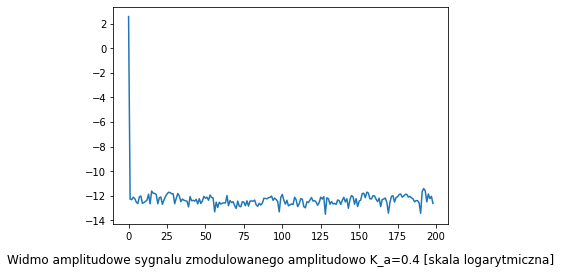

In [6]:
N = len(mod_czest_a)


Widmo_mod_amp_a = widmo_amplitudowe(fft(mod_amp_a)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), table_log(Widmo_mod_amp_a))
plt.title("Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=0.4 [skala logarytmiczna]", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=11')

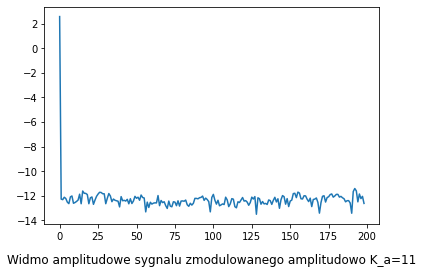

In [7]:
Widmo_mod_amp_b = widmo_amplitudowe(fft(mod_amp_b)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), table_log(Widmo_mod_amp_a))
plt.title("Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=11", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=21')

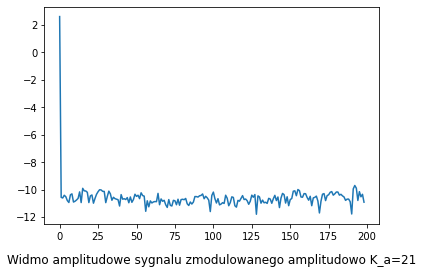

In [8]:
Widmo_mod_amp_c = widmo_amplitudowe(fft(mod_amp_c)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), table_log(Widmo_mod_amp_c))
plt.title("Widmo amplitudowe sygnalu zmodulowanego amplitudowo K_a=21", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=0.3 ')

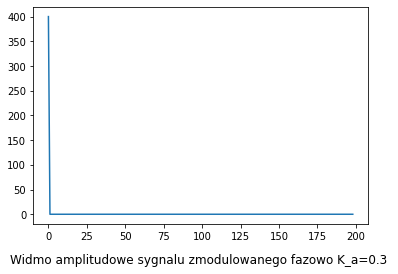

In [9]:
Widmo_mod_kat_a = widmo_amplitudowe(fft(mod_kat_a)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), Widmo_mod_kat_a)
plt.title("Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=0.3 ", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=2')

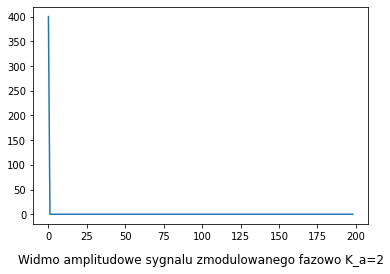

In [10]:
Widmo_mod_kat_b = widmo_amplitudowe(fft(mod_kat_b)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), Widmo_mod_kat_b)
plt.title("Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=2", y=-.21)

Text(0.5, -0.21, 'Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=8')

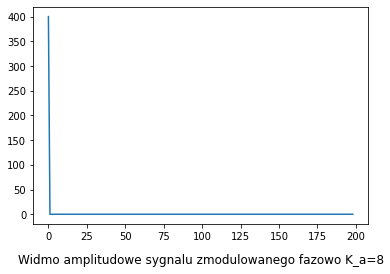

In [11]:
Widmo_mod_kat_c = widmo_amplitudowe(fft(mod_kat_c)[:int(N/2 - 1)])
plt.plot(range(int(N/2 - 1)), Widmo_mod_kat_c)
plt.title("Widmo amplitudowe sygnalu zmodulowanego fazowo K_a=8", y=-.21)